**Jerry Cahyo Setiawan**

Dataset from https://www.kaggle.com/datasets/andrewmvd/face-mask-detection

#Data Preparation

In [ ]:
# Xml parser (extract data from xml file)
# Xml to txt

import xml.etree.ElementTree as ET
import os


annotations = '/content/drive/MyDrive/.../2/annotations'
for file_ in os.listdir(annotations):
    path = os.path.join(annotations, file_)

    tree = ET.parse(path)
    root =  tree.getroot()
    file = root[1].text

    width  = int(root[2][0].text)
    height = int(root[2][1].text)

    classes = {'without_mask':0, 'mask_weared_incorrect':1, 'with_mask':2}


    lines = ''
    for i, child in enumerate(root):
        if child.tag == 'object':
            class_ = root[i][0].text
            x1, y1, x2, y2 = int(root[i][5][0].text), int(root[i][5][1].text), int(root[i][5][2].text), int(root[i][5][3].text)

            x, y = (((x2-x1)/2)+x1)/width, (((y2-y1)/2)+y1)/height
            w, h = (x2-x1)/width, (y2-y1)/height
            line = f'{classes[class_]} {x} {y} {w} {h} \n'
            lines += line

    with open(f"/content/drive/MyDrive/..../2/labels/{file.replace('.png', '.txt').replace('.jpeg', '.txt').replace('.jpg', '.txt')}", 'w') as f:
        f.write(lines)

#YOLOv5 Train

In [ ]:
#clone YOLOv5

!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 2.0.1+cu118 (Tesla T4)


In [ ]:
data = """

train: ./data/custom dataset/train/images
val: ./data/custom dataset/train/images


# Classes
nc: 3  # number of classes
names: ['without mask', 'incorrect mask', 'with mask']  # class names

"""


with open('data/dataset.yaml', 'w') as w:
    w.write(data)


In [ ]:
!python train.py --img 640 --batch 16 --epochs 50 --data dataset.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, 

In [ ]:
!python detect.py --source '../test.png' --weights './runs/train/exp/weights/best.pt/'

detect: weights=['./runs/train/exp/weights/best.pt/'], source=../test.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/test.png: 448x640 2 without masks, 1 with mask, 41.8ms
Speed: 0.5ms pre-process, 41.8ms inference, 93.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


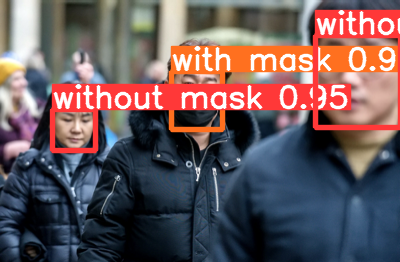

In [ ]:
!python detect.py --source '../test1.png' --weights './runs/train/exp/weights/best.pt/'

detect: weights=['./runs/train/exp/weights/best.pt/'], source=../test1.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/test1.png: 512x640 3 without masks, 41.8ms
Speed: 0.5ms pre-process, 41.8ms inference, 111.6ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


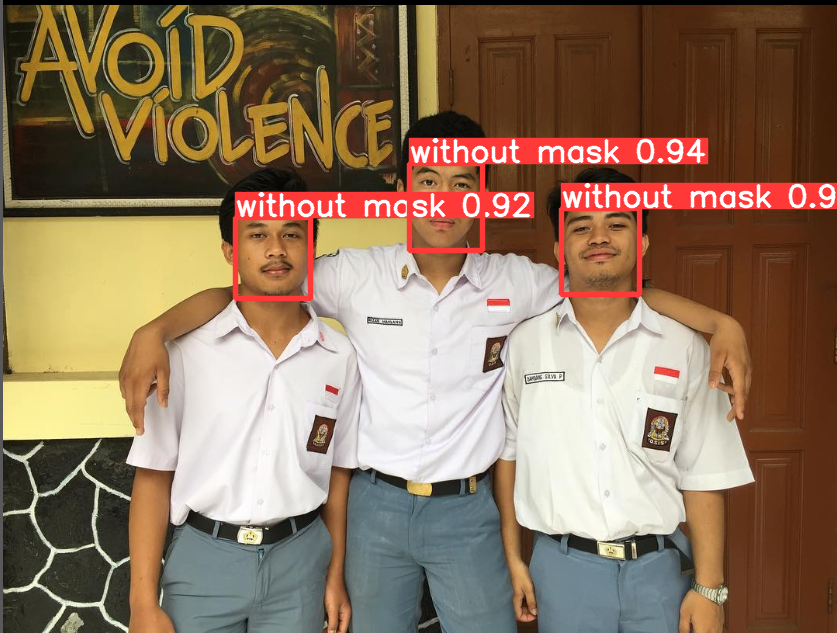

In [ ]:
!python detect.py --source '../test2.png' --weights './runs/train/exp/weights/best.pt/'

detect: weights=['./runs/train/exp/weights/best.pt/'], source=../test2.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-172-gc3c1304 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/test2.png: 416x640 5 with masks, 39.7ms
Speed: 0.5ms pre-process, 39.7ms inference, 75.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


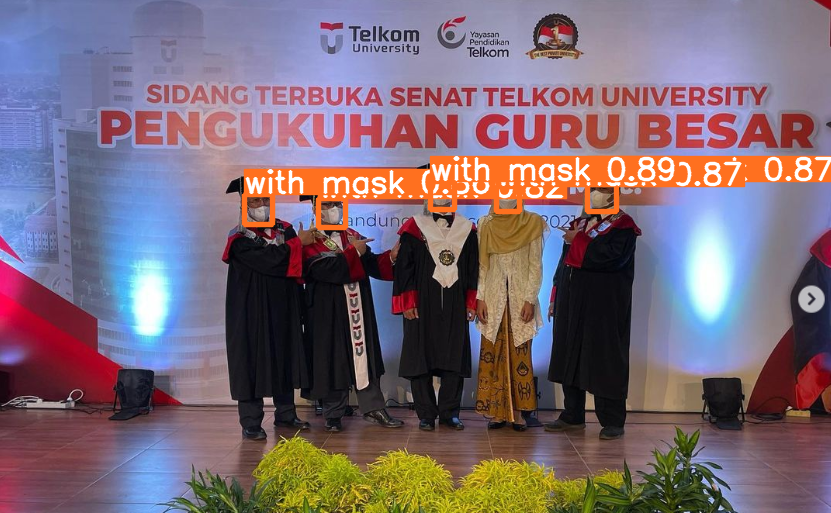